# ml-final-course

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-final-course")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/ml-final-course" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/ml-final-course


'https://jovian.ai/sahilfaizal/ml-final-course'

In [4]:
!pip install opendatasets --upgrade

     |████████████████████████████████| 58 kB 5.5 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 7.9 MB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=d49089ac4fdbc493bb9b1b2cdcbc8c527bc18fecef7fce04b9e8870a1b4ee01d
  Stored in directory: /home/jovyan/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [5]:
import opendatasets as od

In [11]:
dataset_url = 'https://www.kaggle.com/c/PhotoQualityPrediction'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahilsao
Your Kaggle Key: ········


100%|██████████| 2.81M/2.81M [00:00<00:00, 41.1MB/s]


Extracting archive ./PhotoQualityPrediction/PhotoQualityPrediction.zip to ./PhotoQualityPrediction


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , log_loss

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import OneHotEncoder

import os

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
list(os.walk('PhotoQualityPrediction'))

[('PhotoQualityPrediction',
  [],
  ['test.csv', 'example_entry.csv', 'training.csv'])]

In [15]:
os.listdir()

['.bash_logout',
 '.profile',
 '.bashrc',
 '.ipynb_checkpoints',
 '.ipython',
 '.kaggle',
 '.local',
 '.cache',
 '.jovianrc',
 'PhotoQualityPrediction',
 'ml-final-course.ipynb',
 '.jupyter',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.git',
 'work',
 '.npm']

# Photo quality prediction

### loading the dataset

In [16]:
train_data = pd.read_csv('PhotoQualityPrediction/training.csv')
x_test = pd.read_csv('PhotoQualityPrediction/test.csv')
y_test_data = pd.read_csv('PhotoQualityPrediction/example_entry.csv')

train_data.head()

,id,latitude,longitude,width,height,size,name,description,caption,good
0,1,45,16,604,453,31,454 1659,NaN,NaN,1
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0
2,3,38,-97,720,540,71,802,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0


In [17]:
print(train_data.shape)

(40262, 10)


In [18]:
(x_test.id == y_test_data.id).value_counts()

True    12000
Name: id, dtype: int64

In [19]:
x_test = x_test.drop(['id','name'],axis='columns')
x_train = train_data.drop(['id','name','good'],axis='columns')

In [20]:
print('x_train : ',x_train.shape)

y_train = train_data.good
print('y_train : ',y_train.shape)


print('x_test : ',x_test.shape)
y_test = y_test_data.good
print('y_test : ',y_test.shape)

x_train :  (40262, 7)
y_train :  (40262,)
x_test :  (12000, 7)
y_test :  (12000,)


In [21]:
train_data.columns

Index(['id', 'latitude', 'longitude', 'width', 'height', 'size', 'name',
       'description', 'caption', 'good'],
      dtype='object')

## Analyzing ,Exploring and Visualizing data

In [22]:
x_train.corr()

,latitude,longitude,width,height,size
latitude,1.000000,-0.351576,-0.009190,0.035354,-0.044340
longitude,-0.351576,1.000000,-0.017142,-0.003060,0.099262
width,-0.009190,-0.017142,1.000000,-0.091973,0.050525
height,0.035354,-0.003060,-0.091973,1.000000,0.067772
size,-0.044340,0.099262,0.050525,0.067772,1.000000


In [23]:
 x_train.head()

,latitude,longitude,width,height,size,description,caption
0,45,16,604,453,31,NaN,NaN
1,21,-87,720,534,43,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...
2,38,-97,720,540,71,NaN,NaN
3,38,-122,604,453,24,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...
4,-29,24,720,540,13,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...


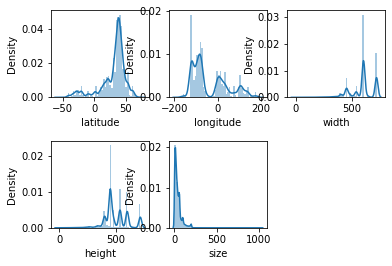

In [24]:
# Distribution plots for all the variables:
n = 0
for x in ['latitude' , 'longitude' , 'width','height','size']:
    n+=1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5)
    sns.distplot(x_train[x])

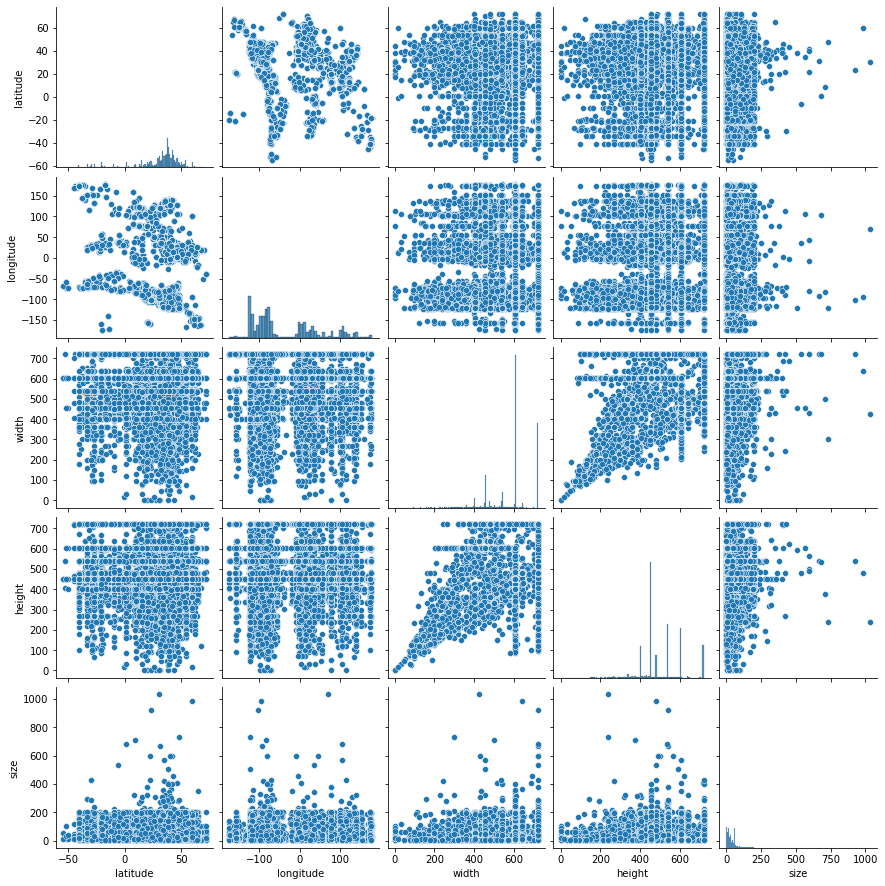

In [25]:
# pair plot
sns.pairplot(data = x_train[['latitude' , 'longitude' , 'width','height','size']])

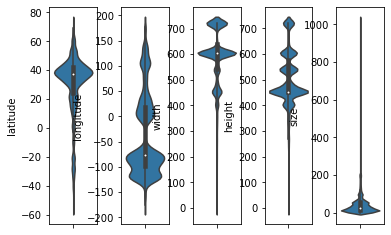

In [26]:
#violin plots
n = 0
for col in ['latitude' , 'longitude' , 'width','height','size']:
    n+=1

    plt.subplot(1,5,n)
    plt.subplots_adjust(wspace=0.5)
    
    sns.violinplot(y=col, data = x_train)
    

# Feature Engineering

### Checking for null values:

In [27]:
print(x_train.isnull().any())
print(x_test.isnull().any())

latitude       False
longitude      False
width          False
height         False
size           False
description     True
caption         True
dtype: bool
latitude       False
longitude      False
width          False
height         False
size           False
description     True
caption         True
dtype: bool


so we can see that there are null values in both x_train , y_train for the columns name, description , caption


In [28]:
x_train.isnull().sum()

latitude           0
longitude          0
width              0
height             0
size               0
description    27564
caption        11807
dtype: int64

In [29]:
x_test.isnull().sum()

latitude          0
longitude         0
width             0
height            0
size              0
description    8257
caption        3558
dtype: int64

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40262 entries, 0 to 40261
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   latitude     40262 non-null  int64 
 1   longitude    40262 non-null  int64 
 2   width        40262 non-null  int64 
 3   height       40262 non-null  int64 
 4   size         40262 non-null  int64 
 5   description  12698 non-null  object
 6   caption      28455 non-null  object
dtypes: int64(5), object(2)
memory usage: 2.2+ MB


In [31]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-final-course")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/ml-final-course" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/ml-final-course


'https://jovian.ai/sahilfaizal/ml-final-course'

#### First lets fill the values in x_train

In [33]:
print(x_train.caption.isnull().mean()) # percentage of null values
print(x_test.caption.isnull().mean())

0.2932541850876757
0.2965


Since also for caption the percentage of null values is less, we wil impute this with most frequent value.

In [34]:
caption_imputer = SimpleImputer(strategy='most_frequent')
caption_imputer.fit(x_train['caption'].values.reshape(-1,1))

SimpleImputer(strategy='most_frequent')

In [35]:
caption_imputer.statistics_

array(['1905'], dtype=object)

In [36]:
x_train.caption = caption_imputer.transform(x_train['caption'].values.reshape(-1,1))
x_test.caption = caption_imputer.transform(x_test['caption'].values.reshape(-1,1))

In [37]:
print(x_train.caption.isnull().mean()) # percentage of null values
print(x_test.caption.isnull().mean())

0.0
0.0


In [38]:
print(x_train.description.isnull().mean()) # percentage of null values
print(x_test.description.isnull().mean())

0.684615766727932
0.6880833333333334


Here filling the null values might not be a good idea, so we will use a seperate class 'missing'.

In [39]:
description_imputer = SimpleImputer(strategy='constant' , fill_value='missing')
description_imputer.fit(x_train['description'].values.reshape(-1,1))

SimpleImputer(fill_value='missing', strategy='constant')

In [40]:
x_train.description = description_imputer.transform(x_train['description'].values.reshape(-1,1))
x_test.description = description_imputer.transform(x_test['description'].values.reshape(-1,1))

In [41]:
print(x_train.description.isnull().mean()) # percentage of null values
print(x_test.description.isnull().mean())

0.0
0.0


In [43]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-final-course")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/ml-final-course" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/ml-final-course


'https://jovian.ai/sahilfaizal/ml-final-course'

### Now there are no null values, we have to handle categorical features now.

In [44]:
categorical_cols = ['description' , 'caption']

we will replace each value by its count/frequency value in a column

In [45]:
def encoder(categ_cols,data):
    print(categ_cols)
    for col in categ_cols:
        print(col)
        frequency_map = data[col].value_counts().to_dict()
        data[col] = data[col].map(frequency_map)
    return data

In [46]:
x_train = encoder(categorical_cols,x_train)

['description', 'caption']
description
caption


In [47]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40262 entries, 0 to 40261
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   latitude     40262 non-null  int64
 1   longitude    40262 non-null  int64
 2   width        40262 non-null  int64
 3   height       40262 non-null  int64
 4   size         40262 non-null  int64
 5   description  40262 non-null  int64
 6   caption      40262 non-null  int64
dtypes: int64(7)
memory usage: 2.2 MB


In [48]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   latitude     12000 non-null  int64 
 1   longitude    12000 non-null  int64 
 2   width        12000 non-null  int64 
 3   height       12000 non-null  int64 
 4   size         12000 non-null  int64 
 5   description  12000 non-null  object
 6   caption      12000 non-null  object
dtypes: int64(5), object(2)
memory usage: 656.4+ KB


In [49]:
x_test = encoder(categorical_cols,x_test)
x_test.info()

['description', 'caption']
description
caption
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   latitude     12000 non-null  int64
 1   longitude    12000 non-null  int64
 2   width        12000 non-null  int64
 3   height       12000 non-null  int64
 4   size         12000 non-null  int64
 5   description  12000 non-null  int64
 6   caption      12000 non-null  int64
dtypes: int64(7)
memory usage: 656.4 KB


### Scaling values

In [50]:
x_train.describe()

,latitude,longitude,width,height,size,description,caption
count,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000
mean,30.342854,-37.662213,587.654265,503.571581,39.872783,18872.798569,3491.177388
std,20.503580,81.312267,108.089076,105.710218,42.195029,12805.281196,5402.197749
min,-55.000000,-175.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,-98.000000,540.000000,453.000000,12.000000,1.000000,1.000000
50%,37.000000,-76.000000,604.000000,453.000000,27.000000,27564.000000,1.000000
75%,42.000000,19.000000,640.000000,576.000000,55.000000,27564.000000,11854.000000
max,72.000000,178.000000,720.000000,720.000000,1030.000000,27564.000000,11854.000000


In [51]:
x_train.head(6)

,latitude,longitude,width,height,size,description,caption
0,45,16,604,453,31,27564,11854
1,21,-87,720,534,43,1,1
2,38,-97,720,540,71,27564,11854
3,38,-122,604,453,24,1,1
4,-29,24,720,540,13,27564,1
5,-21,56,604,453,58,27564,11854


In [52]:
scalar = StandardScaler()

In [53]:
scalar.fit(x_train)

StandardScaler()

In [54]:
x_train = pd.DataFrame(scalar.transform(x_train) , columns=x_train.columns)

In [55]:
x_test = pd.DataFrame(scalar.transform(x_test) , columns=x_test.columns)

In [56]:
x_train.head()

,latitude,longitude,width,height,size,description,caption
0,0.714867,0.659960,0.151227,-0.478404,-0.210283,0.678729,1.548060
1,-0.455675,-0.606777,1.224429,0.287851,0.074114,-1.473770,-0.646074
2,0.373459,-0.729761,1.224429,0.344611,0.737708,0.678729,1.548060
3,0.373459,-1.037222,0.151227,-0.478404,-0.376181,-1.473770,-0.646074
4,-2.894304,0.758348,1.224429,0.344611,-0.636879,0.678729,-0.646074


In [57]:
x_test.head()

,latitude,longitude,width,height,size,description,caption
0,0.178368,-0.988028,0.484289,-0.241906,-0.921276,-0.829028,-0.646074
1,0.178368,-0.557583,-1.615856,0.950047,-0.660579,-1.473770,0.014591
2,0.568549,-0.606777,1.224429,-0.222986,0.097814,-1.473770,-0.646074
3,1.153820,0.438589,0.151227,-0.478404,-0.518380,-0.829028,0.014591
4,-0.504448,1.410164,0.151227,-0.932481,0.477010,-0.829028,0.014591


# Now all the values are scaled

#### Creating out first model and Training the model

In [58]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [59]:
log_model.score(x_test,y_test)  # testing score

0.97525

In [60]:
log_model.score(x_train,y_train)  # training score

0.7365009189806766

In [61]:
log_y_pred = log_model.predict(x_test)

In [62]:
accuracy_score(log_y_pred,y_test)

0.97525

In [63]:
log_loss(log_y_pred,y_test)

0.8548347157740402

#### Creating the second model and Training the model

In [64]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
rf_model.score(x_test,y_test)  # testing score

0.8965833333333333

In [66]:
rf_model.score(x_train,y_train)  # training score

0.9822164820426208

In [67]:
accuracy_score(rf_model.predict(x_test) , y_test)

0.8965833333333333

In [68]:
rf_y_pred = rf_model.predict(x_test)

In [69]:
log_loss(rf_y_pred , y_test)

3.5718851255070136

#### The scores for both the models are pretty good, but we can still observe that 
1. the model log_model is kind of having some high bias,low variance and hence ,a chance of under fitting
2. whereas the model rf_model is having low bias and low variance , a very good model.

But let us hyper tune the second model i.e 'rf_model'  so that we get some more increase in the testing score.

In [70]:
scores = pd.DataFrame(columns = ['n_estimators','max_depth','min_samples_split','min_samples_leaf','max_features','train_score','test_score'    ])

n_estimators = [50,100,120]
max_depth = [None , 5]
min_samples_split = [1.0,2]
min_samples_leaf=[1,2]
max_features=['auto',"sqrt", "log2"]

scores

,n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features,train_score,test_score


In [71]:
for n_est in n_estimators:
    for max_dep in max_depth:
        for min_s_spl in min_samples_split:
            for min_s_leaf in min_samples_leaf:
                for max_fea in max_features:
                    
                    rf = RandomForestClassifier(n_estimators=n_est,
                                                max_depth = max_dep,
                                                min_samples_split = min_s_spl,
                                                min_samples_leaf=min_s_leaf,
                                                max_features=max_fea
                                               )
                    rf.fit(x_train,y_train)
                    test_s = rf.score(x_test,y_test)
                    train_s = rf.score(x_train,y_train)
                    
                    print(n_est,max_dep,min_s_spl,min_s_leaf,max_fea , train_s,test_s)
                    
                    dic = {
                    'n_estimators':n_est,
                    'max_depth' : max_dep,
                    'min_samples_split' : min_s_spl,
                    'min_samples_leaf':min_s_leaf,
                    'max_features':max_fea,
                    'test_score':test_s,
                    'train_score':train_s
                    }
                    scores = scores.append(dic, ignore_index=True)

50 None 1.0 1 auto 0.7378669713377378 1.0
50 None 1.0 1 sqrt 0.7378669713377378 1.0
50 None 1.0 1 log2 0.7378669713377378 1.0
50 None 1.0 2 auto 0.7378669713377378 1.0
50 None 1.0 2 sqrt 0.7378669713377378 1.0
50 None 1.0 2 log2 0.7378669713377378 1.0
50 None 2 1 auto 0.9813968506283841 0.89125
50 None 2 1 sqrt 0.9816203864686305 0.8919166666666667
50 None 2 1 log2 0.9815955491530476 0.88775
50 None 2 2 auto 0.8986140777904724 0.9163333333333333
50 None 2 2 sqrt 0.8989618002086335 0.91375
50 None 2 2 log2 0.8996572450449556 0.9120833333333334
50 5 1.0 1 auto 0.7378669713377378 1.0
50 5 1.0 1 sqrt 0.7378669713377378 1.0
50 5 1.0 1 log2 0.7378669713377378 1.0
50 5 1.0 2 auto 0.7378669713377378 1.0
50 5 1.0 2 sqrt 0.7378669713377378 1.0
50 5 1.0 2 log2 0.7378669713377378 1.0
50 5 2 1 auto 0.7380905071779842 1.0
50 5 2 1 sqrt 0.7378918086533207 1.0
50 5 2 1 log2 0.7378669713377378 1.0
50 5 2 2 auto 0.7378918086533207 1.0
50 5 2 2 sqrt 0.7379663206000695 1.0
50 5 2 2 log2 0.7379166459689037

In [72]:
scores.head()

,n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features,train_score,test_score
0,50,None,1.0,1,auto,0.737867,1.0
1,50,None,1.0,1,sqrt,0.737867,1.0
2,50,None,1.0,1,log2,0.737867,1.0
3,50,None,1.0,2,auto,0.737867,1.0
4,50,None,1.0,2,sqrt,0.737867,1.0


# we will find which set of paraameters give more than 90 percent accuracy for both test data and train data

In [73]:
scores[scores['train_score']>=0.9][scores['test_score']>=0.9]

,n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features,train_score,test_score
33,100,None,2.0,2,auto,0.901719,0.923000
34,100,None,2.0,2,sqrt,0.900974,0.916750
35,100,None,2.0,2,log2,0.901669,0.919667
57,120,None,2.0,2,auto,0.900974,0.918917
58,120,None,2.0,2,sqrt,0.900998,0.915750


### Now from all the parameters we have for the RandomForestClassifier model, we will select those, which have low bias and low variance.

So we will choose anyone of the set of hyperparameters and build the model.

In [74]:
optimized_rf = RandomForestClassifier(n_estimators=100 , max_depth=None, min_samples_split=2,min_samples_leaf=2,max_features='log2')
optimized_rf.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2)

In [75]:
optimized_rf.score(x_train,y_train) # training score

0.9009984600864338

In [76]:
optimized_rf.score(x_test,y_test) # testing score

0.9168333333333333

In [77]:
log_loss(optimized_rf.predict(x_test),y_test)

2.872474903510072

### Saving the model

In [78]:
import pickle

In [79]:
serial_model = {
    'optimized_rf' : optimized_rf,
    'caption_imputer' : caption_imputer,
    'description_imputer' : description_imputer,
    'categorical_cols' :categorical_cols,
    'encoder' : encoder,
    'scalar' : scalar
}

In [80]:
with open ('rf_photo_quality_predictor', 'wb') as f:
    pickle.dump(serial_model,f)

In [81]:
# load the model:

with open ('rf_photo_quality_predictor', 'rb') as f:
    mymod = pickle.load(f)

In [82]:
mymod['optimized_rf'].n_estimators

100

#### Now this way , we got our model back again from the saved version.

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-final-course")

<IPython.core.display.Javascript object>